# K-Means Clustering Approach

#### Load Data and spaCy Model

In [1]:
import pandas as pd

Execute this block for all data:

In [2]:
data = pd.read_pickle("../data/02_All_Decreased_Filesize.pkl")

Execute this block for the Frequent Committers Subset:

In [3]:
data = pd.read_pickle('../data/03_Subset_Frequent_Committers.pkl')

In [4]:
data.head(3)

,message,author_email,project
0,Fixed an error happening when the memory stats...,michele.simionato@gmail.com,gem_oq-engine
1,Updated setup.py [skip CI],michele.simionato@gmail.com,micheles_decorator
2,Fixed an exposure test [skip hazardlib],michele.simionato@gmail.com,gem_oq-engine


In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")

#### Take a Subset

In [6]:
# Taking a subset has not any influence when training on the frequent committer dataset since it has less then 1000000 samples

subset_size = 100000

messages = data["message"][:subset_size].tolist()

#### Build Document Vectors

In [7]:
vectors = []

docs = nlp.pipe(messages)

for doc in docs:
    vectors.append(doc.vector)

## Clustering the Subset with K-Means

#### Training

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(100)
kmeans.fit(vectors)
kmeans_prediction = kmeans.predict(vectors)

#### Evaluation

In [9]:
#import warnings
#warnings.filterwarnings('ignore')

from utils.k_means import k_means_summary

k_means_summary = k_means_summary(kmeans_prediction, kmeans.n_clusters, data)
k_means_summary

,Number of Messages,Number of different Authors,Average number of commits per different Author,Most common Author,Number of different Projects,Average number of commits per different Project,Most common project
0,468.0,29.0,16.137931,"('postmodern.mod3@gmail.com', 216)",111.0,4.216216,"('ronin-ruby_ronin', 127)"
1,1258.0,30.0,41.933333,"('github@contao.org', 1081)",67.0,18.776119,"('contao_contao', 1081)"
2,148.0,27.0,5.481481,"('crynobone@gmail.com', 39)",60.0,2.466667,"('ccxt_ccxt', 32)"
3,530.0,36.0,14.722222,"('P.Rudiger@ed.ac.uk', 121)",102.0,5.196078,"('pyviz_holoviews', 115)"
4,841.0,41.0,20.512195,"('ns@vivid-planet.com', 67)",165.0,5.096970,"('saltstack_salt', 108)"
...,...,...,...,...,...,...,...
95,839.0,41.0,20.463415,"('thatch45@gmail.com', 80)",162.0,5.179012,"('saltstack_salt', 132)"
96,324.0,25.0,12.960000,"('pedro@algarvio.me', 113)",52.0,6.230769,"('saltstack_salt', 133)"
97,222.0,37.0,6.000000,"('P.Rudiger@ed.ac.uk', 22)",83.0,2.674699,"('gem_oq-engine', 19)"
98,952.0,37.0,25.729730,"('michele.simionato@gmail.com', 261)",138.0,6.898551,"('gem_oq-engine', 268)"


In [10]:
k_means_summary.describe()

,Number of Messages,Number of different Authors,Average number of commits per different Author,Number of different Projects,Average number of commits per different Project
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,683.250000,29.100000,28.092792,91.530000,12.671479
std,387.721116,12.215655,23.189984,55.199995,21.542205
min,74.000000,1.000000,5.481481,1.000000,2.466667
25%,411.500000,22.000000,17.522556,42.750000,5.169042
50%,649.000000,34.500000,22.661123,90.000000,6.878409
75%,895.750000,39.000000,31.280229,128.500000,10.627976
max,2313.000000,42.000000,180.000000,231.000000,180.000000


In [11]:
from utils.k_means import print_k_means_classes

print_k_means_classes(kmeans_prediction, kmeans.n_clusters, data[:][:subset_size])


________________ Class 0 ________________

___
1) 
Restored parallel.Sequential correctly

- - - 
Committer: michele.simionato@gmail.com
Project:   gem_oq-engine
___
2) 
Reduced multi_fault.BLOCKSIZE

- - - 
Committer: michele.simionato@gmail.com
Project:   gem_oq-engine
___
3) 
Reduced event_based.BLOCKSIZE

- - - 
Committer: michele.simionato@gmail.com
Project:   gem_oq-engine
___
4) 
Removed dependence from cost.TRT

- - - 
Committer: michele.simionato@gmail.com
Project:   gem_oq-engine
___
5) 
Changed one character _->. for clarity

- - - 
Committer: michele.simionato@gmail.com
Project:   gem_oq-engine
___
6) 
lxd: instance.LoadByProject usage

- - - 
Committer: thomas.parrott@canonical.com
Project:   lxc_lxd
___
7) 
lxd: Wraps validate.IsNetworkAddressCIDRV6 in validate.Optional

- - - 
Committer: thomas.parrott@canonical.com
Project:   lxc_lxd
___
8) 
shared/instance: Wraps validate.IsPriority in validate.Optional

- - - 
Committer: thomas.parrott@canonical.com
Project:   lxc_lx

A kmeans model was trained on the vectors spacy calculates for each document.

This clustering approach can detect some commonalities in between the commit messages. For example, in one cluster all messages include the tag &lt;I>, in others there is always something that is fixed, some always have an URL or a file path and also lengths and sentence structure can be equal in classes sometimes.

That is why one could argue that messages in one resulting cluster of k-means should have approximately equal quality.

## Finding the best number of clusters

Idea: Use the "Elbow method" to calculate the best fitting number of cluster centers.

https://github.com/Hassaan-Elahi/Writing-Styles-Classification-Using-Stylometric-Analysis

This method aims at finding out where the sum of the squared distances from each point to its assigned cluster centroid is minimal.

Thus, it can be argued that this provides the best possible clustering outcome.

In [13]:
inertia = []
K = range(1, 500)

for k in K:
    kmeans = KMeans(k)
    kmeans.fit(vectors)
    inertia.append(kmeans.inertia_)

# takes about 30s per iteration on M1 MacBook Air

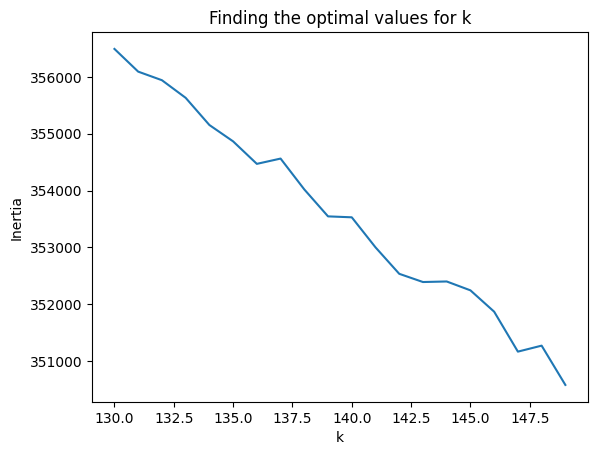

In [ ]:
import matplotlib.pyplot as plt

plt.plot(K, inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Finding the optimal value for k')
plt.show()